In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import matplotlib as mpl
mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'xtick.direction' : 'in' ,
    'xtick.labelsize' : 13 ,
    'xtick.top' : True ,
    'ytick.direction' : 'in' ,
    'ytick.labelsize' : 13 ,
    'ytick.right' : True ,
    'axes.labelsize' : 16,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 1.5,
    'savefig.dpi' : 600, 
    'savefig.bbox' : 'tight'
})

In [2]:
def Euler(f, x, t, h):
    return x + h*f(x,t)
def RK2(f, x, t, h):
    k1 = h*f(x, t)
    k2 = h*f(x+0.5*k1, t+0.5*h)
    return x+k2
def RK4(f, x, t, h):
    k1 = h*f(x, t)
    k2 = h*f(x+0.5*k1, t+0.5*h)
    k3 = h*f(x+0.5*k2, t+0.5*h)
    k4 = h*f(x+k3, t+h)
    return x+ (k1+2*k2+2*k3+k4)/6.

In [3]:
def f(x, t):
    th, p = x
    fth = p
    fp = -th
    return np.array([fth, fp])

In [87]:
T = 20
N = 500
t = np.linspace(0, T, N)

h = t[1] - t[0]
s = np.zeros((N,2))
s[0,0] = 1
for i in range (N-1):
    s[i+1] = Euler(f, s[i], t[i], h)
E1 = s[:, 1]**2 + s[:, 0]**2

s = np.zeros((N,2))
s[0,0] = 1
for i in range (N-1):
    s[i+1] = RK2(f, s[i], t[i], h)
E2 = s[:, 1]**2 + s[:, 0]**2

s = np.zeros((N,2))
s[0,0] = 1
for i in range (N-1):
    s[i+1] = RK4(f, s[i], t[i], h)
E3 = s[:, 1]**2 + s[:, 0]**2

In [88]:
def ff(x, t):
    return -x
def verlet(f, x, p, h, t): #velocity verlet
    p += 0.5*h*f(x, t)
    x += h*p
    p += 0.5*h*f(x, t)
    return x, p

x = np.zeros(t.size)
p = np.zeros_like(x)
x[0], p[0] = 1, 0
for i in range (N-1):
    x[i+1], p[i+1] = verlet(ff, x[i], p[i], h, t[i])
E4 = x**2 + p**2

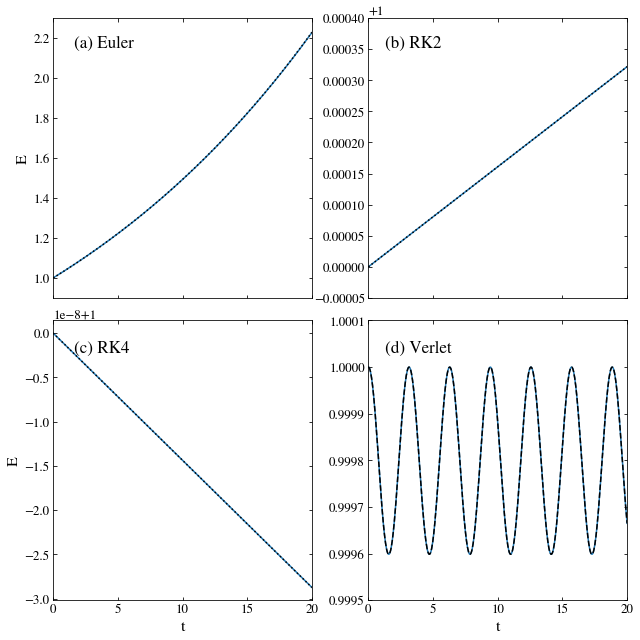

In [125]:
fig, ax = plt.subplots(2, 2, figsize=(9, 9), sharex=True)
ax[0,0].plot(t, E1, label='Euler')
ax[0,0].plot(t, np.exp(h*t), 'k:')
ax[0,0].set_ylim(0.9, 2.3)

ax[0,1].plot(t, E2, label='RK2')
ax[0,1].plot(t, np.exp(h**3/4*t), 'k:')
ax[0,1].set_ylim(0.99995, 1.0004)

ax[1,0].plot(t, E3, label='RK4')
ax[1,0].plot(t, np.exp(-h**5*t/72), 'k:')


ax[1,1].plot(t, E4, label='Verlet')
ax[1,1].plot(t, 1-0.25*h**2*np.sin(t*(1+1/24*h**2))**2, 'k--')
#ax[1,1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2e}"))
ax[1,1].set_ylim(0.9995, 1.0001)

ax[0,0].set_ylabel('E')
ax[1,0].set_ylabel('E')
ax[1,0].set_xlabel('t')
ax[1,1].set_xlabel('t')
for ax in ax.flat:
    ax.set_xlim(0,20)
plt.tight_layout()
fig.text(0.12, 0.92, '(a) Euler', fontsize=17)
fig.text(0.6, 0.92, '(b) RK2', fontsize=17)
fig.text(0.12, 0.45, '(c) RK4', fontsize=17)
fig.text(0.6, 0.45, '(d) Verlet', fontsize=17)
plt.savefig('compare.png')

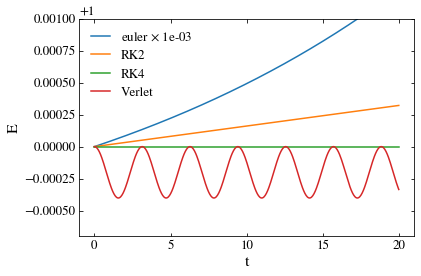

In [92]:
plt.plot(t, (E1-1)/1000+1, label=r'euler $\times$ %.e'%1e-3)
#plt.plot(t, E1, label='euler')
plt.plot(t, E2, label='RK2')
plt.plot(t, E3, label='RK4')
plt.plot(t, E4, label='Verlet')
plt.ylim(0.9993, 1.001)
#plt.yscale('log')
plt.legend()
plt.ylabel('E')
plt.xlabel('t')
plt.savefig('compare2.png')